# Phenomenological Aging Model

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [127]:
def f(x, alpha_damage_propagation, disease_rate, t=None):
    return (1-x)*(alpha_damage_propagation*x + disease_rate)

In [182]:
a = 0.0
b = 100
rango_alpha = np.arange(0,20,2)
alpha_damage_propagation = 0.031
rango_damage_propagation = alpha_damage_propagation*rango_alpha
rango_alpha_adicional = np.linspace(0,1,6)*alpha_damage_propagation

rango_alphas = np.concatenate((rango_alpha_adicional,rango_damage_propagation), axis=0)
coupling_factor = 0.089
mortality_rate = 4.3*(10**(-5))
disease_rate = 0.05


N = 100

x_points = []
temporal_points = []

for alpha in rango_alphas:
    x = 0.0
    h = (b-a)/N
    temporal_individuals_points = np.arange(a,b,h)
    x_individual_points = []
    for t in temporal_individuals_points:
        x_individual_points.append(x)
        k1 = h*f(x, alpha, disease_rate, t=t)
        k2 = h*f(x+0.5*k1, alpha, disease_rate, t=t +0.5*h)
        x += k2
    x_points.append(x_individual_points)
    temporal_points.append(temporal_individuals_points)

In [185]:
rango_alphas

array([0.    , 0.0062, 0.0124, 0.0186, 0.0248, 0.031 , 0.    , 0.062 ,
       0.124 , 0.186 , 0.248 , 0.31  , 0.372 , 0.434 , 0.496 , 0.558 ])

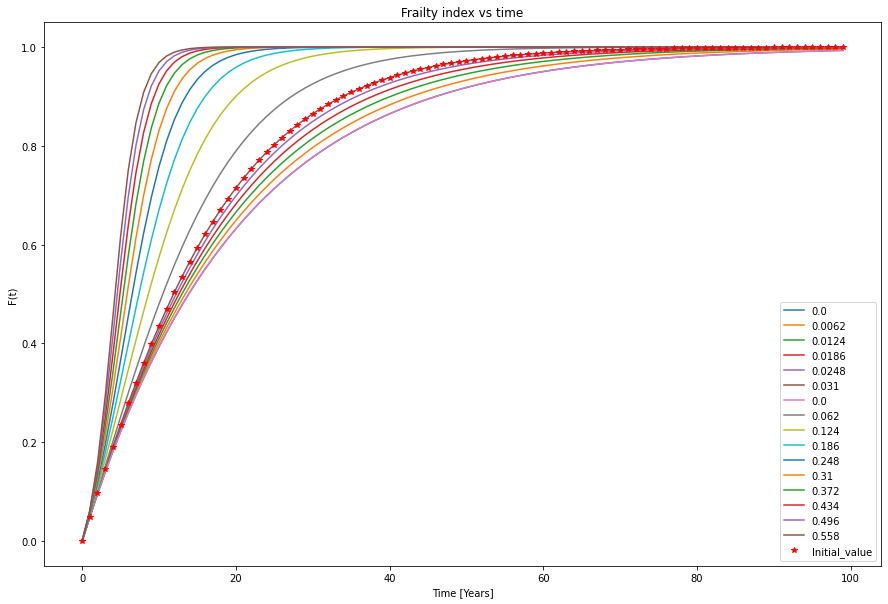

In [192]:
plt.figure(figsize=(15,10))
for i in range(len(rango_alphas)):
    plt.plot(temporal_points[i], x_points[i], label = f"{round(rango_alphas[i],4)}")
plt.plot(temporal_points[5], x_points[5], "*", color = "red", label = "Initial_value")
plt.title("Frailty index vs time")
plt.xlabel("Time [Years]")
plt.ylabel("F(t)")
plt.legend()
plt.show()

In [186]:
x_points = np.array(x_points)
gompertz_data = mortality_rate*(x_points**(coupling_factor/alpha_damage_propagation))

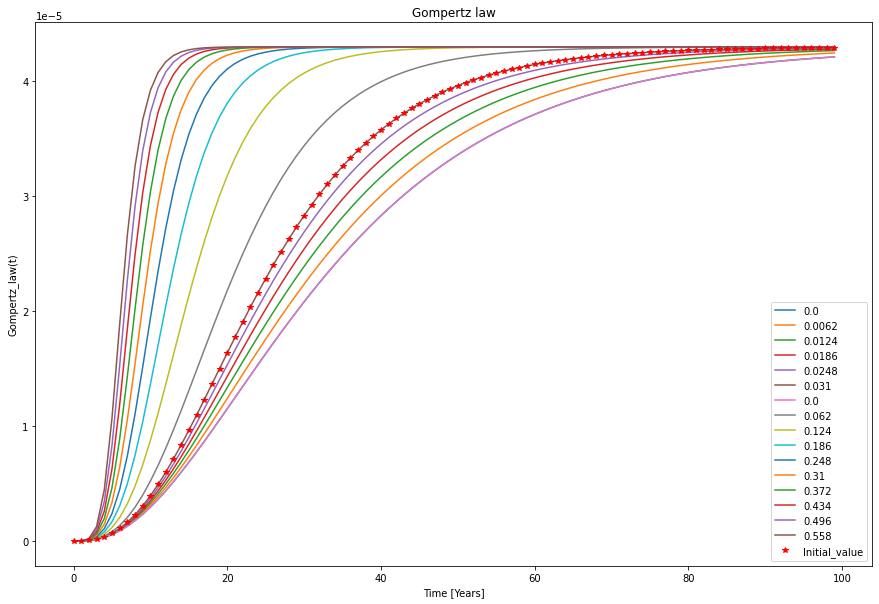

In [193]:
plt.figure(figsize=(15,10))
for i in range(len(rango_alphas)):
    plt.plot(temporal_points[i], gompertz_data[i], label = f"{round(rango_alphas[i],4)}")
plt.plot(temporal_points[5], gompertz_data[5], "*", color = "red", label = "Initial_value")
plt.title("Gompertz law")
plt.xlabel("Time [Years]")
plt.ylabel("Gompertz_law(t)")
plt.legend()
plt.show()